In [26]:
import torch
import torch.nn as nn
import sklearn
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import math

# Creating data using sklearn

In [27]:
X, y = make_regression(n_samples = 10,                 #number of samples
                                      n_features = 3,            #number of features
                                      n_informative = 3,         #number of useful features

                                      random_state = 42)            #set for same data points for each run



In [28]:
X = 10 * X.round(2)

In [29]:
X

array([[ -9.1,  14.7, -14.1],
       [ -5.4, -11.5,   1.1],
       [  2.4, -17.2, -19.1],
       [  3.8,  -2.9,  -6. ],
       [ 15.2,  -2.3,  -2.3],
       [  5.4,  -4.7,  -4.6],
       [  5. ,   6.5,  -1.4],
       [ -5.6,   3.1, -10.1],
       [ 15.8,  -4.7,   7.7],
       [ -2.3, -14.2,   0.7]])

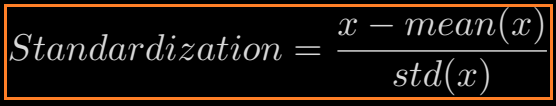

# Create Custom Layer

In [30]:
class StandardizedLayer(nn.Module):
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out

        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)  #
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases

        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias in

    def forward(self, x):
        z = (x - torch.mean(x)) / torch.std(x)
        return z

In [31]:
standlayer = StandardizedLayer(3,3)

# Convert to pytorch tensor

In [32]:
Xt = torch.tensor(X, dtype=torch.float32)
yt = torch.tensor(y, dtype=torch.float32)

# Standardized the data with custom Layer

In [33]:
X_stand = standlayer(Xt)

In [34]:
X_stand

tensor([[-0.8040,  1.8425, -1.3599],
        [-0.3925, -1.0708,  0.3303],
        [ 0.4748, -1.7047, -1.9159],
        [ 0.6305, -0.1145, -0.4592],
        [ 1.8981, -0.0478, -0.0478],
        [ 0.8084, -0.3147, -0.3036],
        [ 0.7639,  0.9307,  0.0523],
        [-0.4148,  0.5527, -0.9152],
        [ 1.9649, -0.3147,  1.0642],
        [-0.0478, -1.3711,  0.2858]])

# Create Neural Network and add custom layer

In [35]:
model = nn.Sequential(
          StandardizedLayer(3,3),
          nn.Linear(3,1),
)

model

Sequential(
  (0): StandardizedLayer()
  (1): Linear(in_features=3, out_features=1, bias=True)
)

In [36]:
learningRate = 0.01
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learningRate)

In [37]:
epochs = 10
losses = torch.zeros(epochs)

for epoch in range(epochs):
    ypred = model(Xt)
    loss = lossfunc(ypred.squeeze(),yt)
    losses[epoch] = loss


    print(f'epochs : {epoch} loss : {loss.detach(): 1.2f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 0 loss :  5624.54
epochs : 1 loss :  5395.08
epochs : 2 loss :  5175.54
epochs : 3 loss :  4965.47
epochs : 4 loss :  4764.44
epochs : 5 loss :  4572.04
epochs : 6 loss :  4387.88
epochs : 7 loss :  4211.58
epochs : 8 loss :  4042.80
epochs : 9 loss :  3881.20
